<a href="https://colab.research.google.com/github/Rahulrathod3624/Rahulrathod3624/blob/main/traffic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/Traffic.csv')
df=data
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


1)1. What is the average total traffic volume for each day of the week?



In [ ]:
average_traffic_by_day = df.groupby('Day of the week')['Total'].mean()
average_traffic_by_day


,Total
Day of the week,
Friday,109.322917
Monday,112.958333
Saturday,115.848958
Sunday,114.356771
Thursday,114.562500
Tuesday,115.239583
Wednesday,116.362500


2. What is the highest car count observed on any given day?



In [ ]:
max_car_count = df['CarCount'].max()
max_car_count

180

3) Calculate average daily count

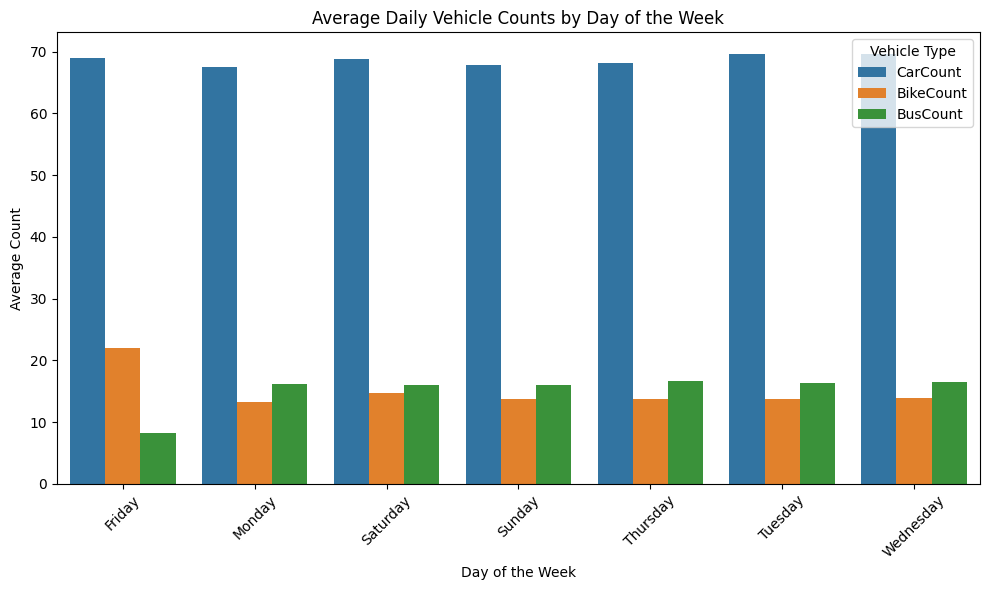

In [ ]:
average_counts = df.groupby('Day of the week')[['CarCount', 'BikeCount', 'BusCount']].mean()
average_counts_melted = average_counts.reset_index().melt(id_vars=['Day of the week'], var_name='Vehicle Type', value_name='Average Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Day of the week', y='Average Count', hue='Vehicle Type', data=average_counts_melted)
plt.title('Average Daily Vehicle Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4)Total traffic volume throughout the day

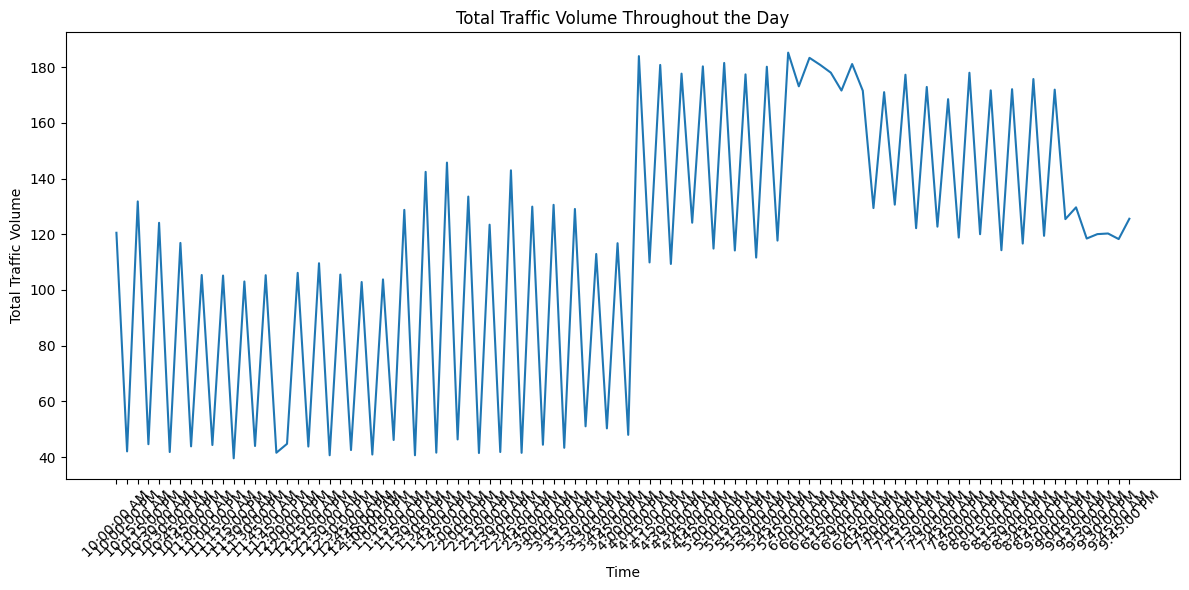

In [ ]:
time_groups = df.groupby('Time')['Total'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Total', data=time_groups)
plt.title('Total Traffic Volume Throughout the Day')
plt.xlabel('Time')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=45)
plt.tight_layout()

5)Traffic Situation Analysis



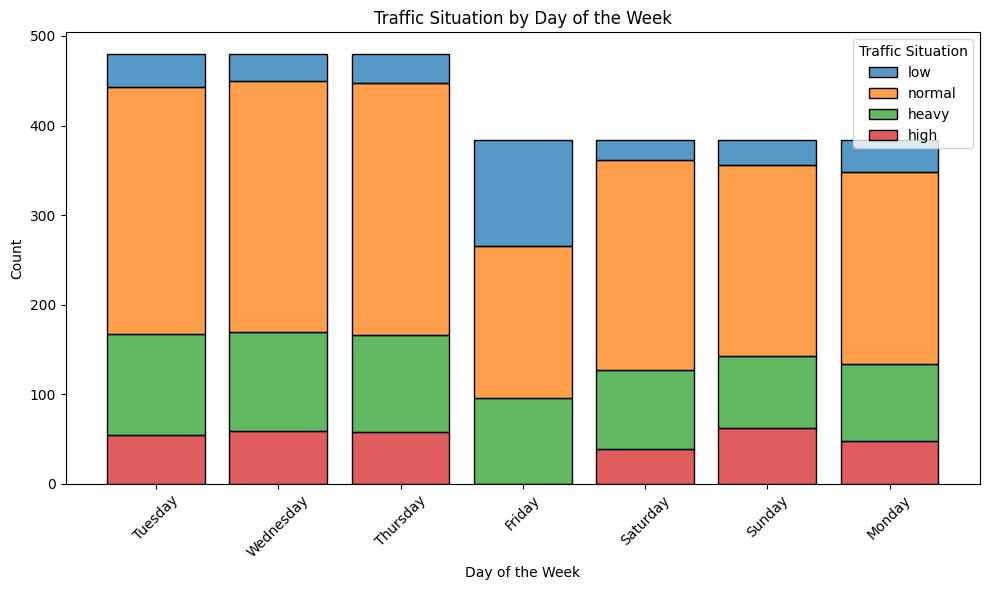

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Day of the week', hue='Traffic Situation', data=df, multiple="stack", shrink=.8)
plt.title('Traffic Situation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6)Correlation between Vehicle Counts

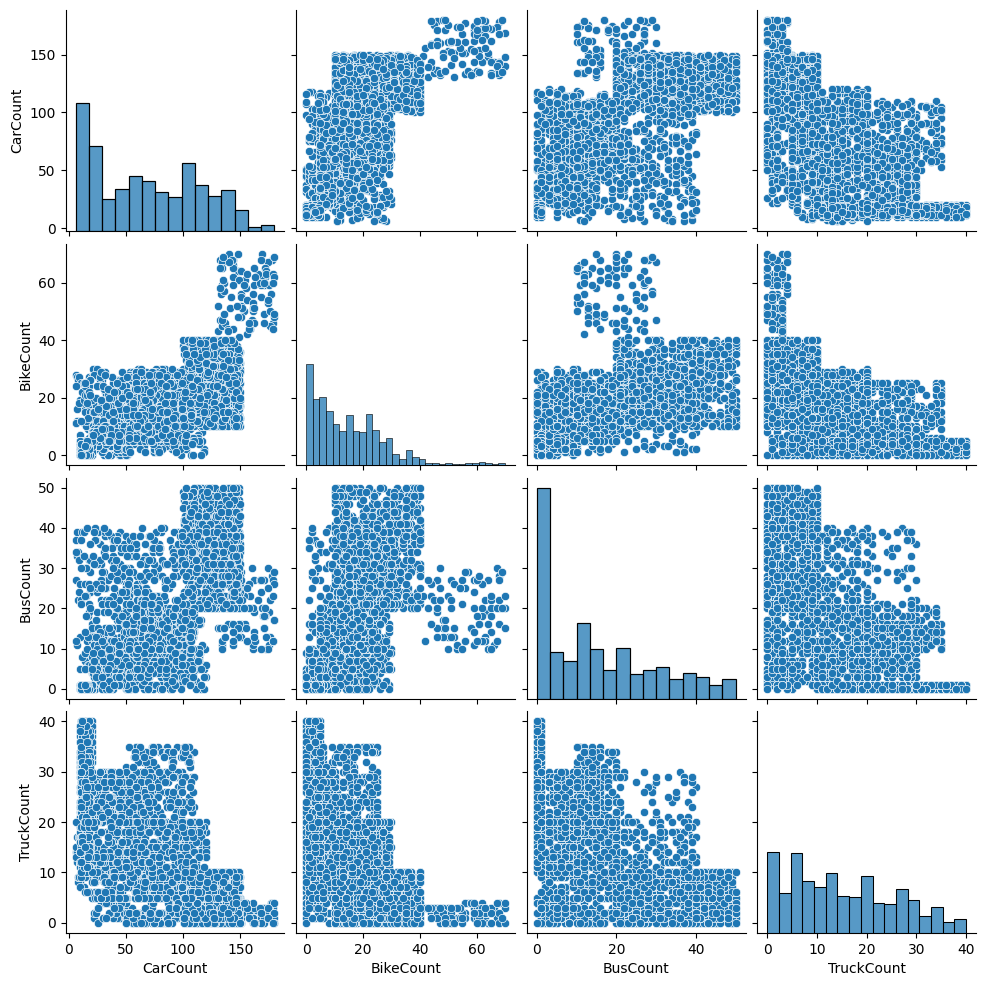

In [ ]:
sns.pairplot(df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']])
plt.show()

7)How many observations have a 'low' traffic situation?

In [ ]:
low_traffic_count = df[df['Traffic Situation'] == 'low'].shape[0]
low_traffic_count


304

8)What is the average car count during 'normal' traffic situations?

In [ ]:
average_car_count_normal = df[df['Traffic Situation'] == 'normal']['CarCount'].mean()
average_car_count_normal

45.2486518873577

9)How many unique dates are present in the dataset?

In [ ]:
unique_dates = df['Date'].nunique()
unique_dates

31

10)Get the count of each traffic situation with pie chart

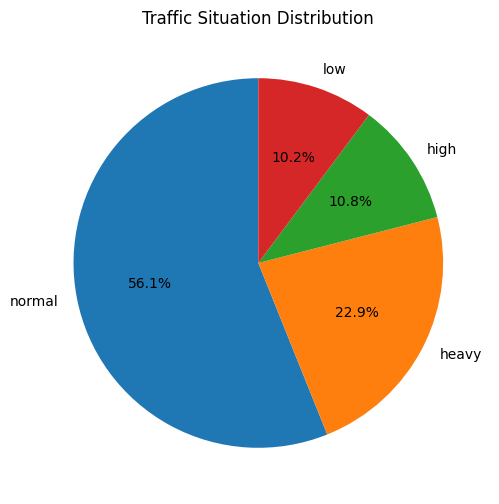

In [ ]:
traffic_situation_counts = df['Traffic Situation'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(traffic_situation_counts, labels=traffic_situation_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Traffic Situation Distribution')
plt.show()

11)example on count plot

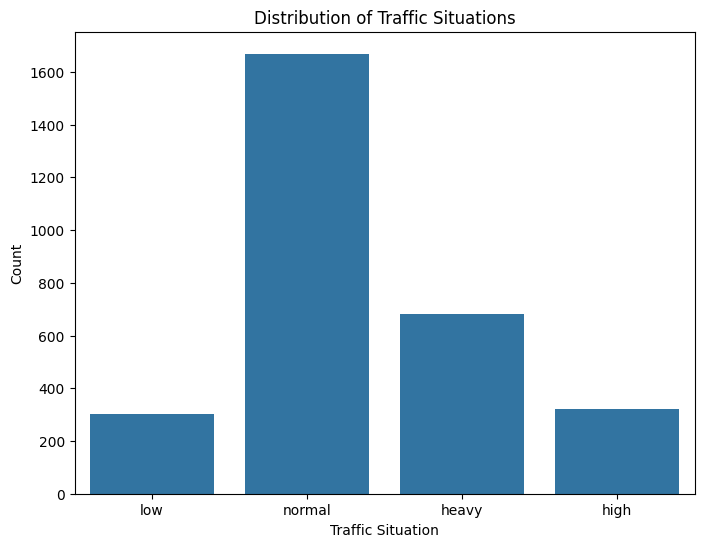

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

12)Realationship between car count and traffic volume

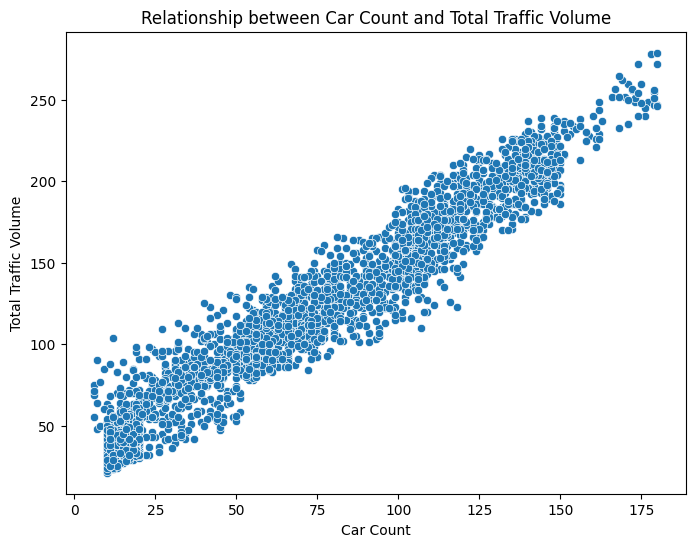

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CarCount', y='Total', data=df)
plt.title('Relationship between Car Count and Total Traffic Volume')
plt.xlabel('Car Count')
plt.ylabel('Total Traffic Volume')
plt.show()

13)Display the high Traffic times

In [ ]:
high_traffic_times = df[df['Traffic Situation'] =='high']['Time'].unique()
high_traffic_times


array(['9:15:00 AM', '9:45:00 AM', '10:00:00 AM', '1:15:00 PM',
       '1:45:00 PM', '2:00:00 PM', '7:30:00 PM', '8:00:00 PM',
       '9:30:00 PM', '6:00:00 AM', '10:15:00 AM', '10:30:00 AM',
       '10:45:00 AM', '2:15:00 PM', '3:15:00 PM', '4:45:00 PM',
       '9:00:00 PM', '9:15:00 PM', '9:45:00 PM', '12:45:00 PM',
       '5:00:00 PM', '7:00:00 PM', '7:15:00 PM', '8:30:00 AM',
       '3:45:00 PM', '6:45:00 PM', '8:45:00 PM', '6:45:00 AM',
       '2:30:00 PM', '8:30:00 PM', '7:00:00 AM', '7:30:00 AM',
       '8:15:00 AM', '9:30:00 AM', '12:30:00 PM', '6:00:00 PM',
       '8:15:00 PM', '3:30:00 PM', '5:15:00 PM', '7:45:00 PM',
       '1:30:00 PM', '2:45:00 PM', '6:15:00 AM', '7:45:00 AM',
       '8:00:00 AM', '3:00:00 PM', '4:15:00 PM', '8:45:00 AM',
       '6:15:00 PM', '4:30:00 PM', '5:45:00 PM', '12:15:00 PM',
       '1:00:00 PM', '6:30:00 PM', '7:15:00 AM', '6:30:00 AM'],
      dtype=object)

14)Per day vehicle counts

In [ ]:
daily_counts = df.groupby('Day of the week')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].sum()
daily_counts

,CarCount,BikeCount,BusCount,TruckCount,Total
Day of the week,,,,,
Friday,26478,8452,3154,3896,41980
Monday,25893,5064,6206,6213,43376
Saturday,26446,5624,6151,6265,44486
Sunday,26070,5290,6175,6378,43913
Thursday,32704,6633,8027,7626,54990
Tuesday,33426,6627,7816,7446,55315
Wednesday,33424,6704,7943,7783,55854


Conclusion:

The traffic dataset analysis reveals that traffic volume is highest on weekdays, peaking during rush hours. Cars contribute significantly to the overall traffic. "Normal" traffic situations are most prevalent, while "high" traffic is more likely on Mondays, Wednesdays, and Fridays. These findings can help in traffic management and urban planning for optimized transportation systems.